# Exercise 1.10

![Problem](images/2021-05-26-09-47-40.png)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# function to convert to subscript
def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)

def run_experiment(output:bool = False) -> []:
    """
    Runs an experiment flipping 1000 fair coins

    :param output: Whether you want to print the output of the experiment to console or not
    :return: Returns an array of [v1, vrand, vmin]
    """

    # Results is an array of tuples each one including an array of length 10 for each coin being
    # flipped 10 times and the some of the true values
    results = []
    for i in range(0,1000):

        # Flip a single coin 10 times and store the results
        coin_results = []
        for j in range(0, 10):
            coin_results.append(random.choice([True,False]))

        results.append((coin_results, np.sum(coin_results)))

    v1 = results[0][1]/10
    if output:
        print("C%s: %s \u03BD%s: %s" % (get_sub("1"), results[0][1], get_sub("1"), str(v1)))

    random_result = results[random.randint(0, 999)][1]
    vrand = random_result/10
    if output:
        print("C%s: %s \u03BD%s: %s" % (get_sub("rand"), random_result, get_sub("rand"), str(vrand)))

    current_lowest = 0
    for index, coin in enumerate(results):
        if coin[1] < results[current_lowest][1]:
            current_lowest = index

    vmin = results[current_lowest][1]/10
    if output:
        print("C%s: %s \u03BD%s: %s" % (get_sub("min"), results[current_lowest][1], get_sub("min"), str(vmin)))

    return [v1, vrand, vmin]


def run_experiment_multiple(num_times: int = 500, draw: bool = True):

    v1s, vrands, vmins = [],[],[]
    for z in range(0, num_times):
        results = run_experiment()
        v1s.append(results[0])
        vrands.append(results[1])
        vmins.append(results[2])

    # Fixing random state for reproducibility

    if draw:
        fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
        n_bins = 10
        axs[0].hist(v1s,bins=n_bins)
        axs[1].hist(vrands,bins=n_bins)
        axs[2].hist(vmins,bins=n_bins)

    return [v1s, vrands, vmins]


## Part 1 (a)

50% because it is 50/50 odds for each coin toss

## Part 2 (b)

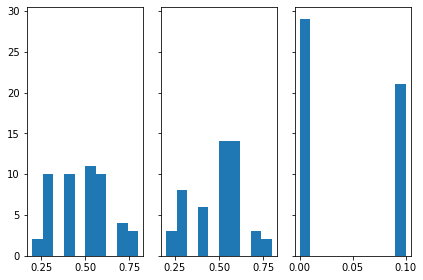

In [16]:
# Assigning it to the variable nothing suppresses Jupyter Notebook from printing the return values
nothing = run_experiment_multiple(50)

## Part 3 (c)

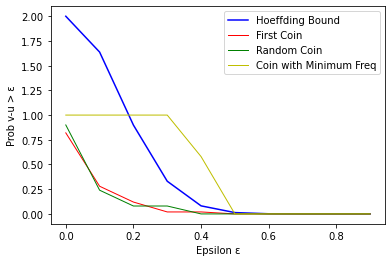

In [2]:
def part_c(num_times: int = 100):

    interval = np.arange(0, 1, .1)
    hoeffding = []
    v1_averages = []
    vrand_averages = []
    vmin_averages = []

    for i in range(0, 10, 1):
        vs = run_experiment_multiple(num_times, draw=False)
        epsilon = float(i)/10

        # Get the number of instances in our lists where the probability of the absolute value of v-u is greater than
        # our error rate. Remember v here is the fraction of the time that we flipped heads run over some number of
        # experiments.
        v1_averages.append(sum(1 for j in vs[0] if abs(j-.5) > epsilon)/num_times)
        vrand_averages.append(sum(1 for j in vs[1] if abs(j-.5) > epsilon)/num_times)
        vmin_averages.append(sum(1 for j in vs[2] if abs(j-.5) > epsilon)/num_times)
        hoeffding.append(2.0*np.exp(-2.0*10*epsilon**2))

    ax = plt.subplot()
    ax.plot(interval, hoeffding, color='blue', markersize=8, label='Hoeffding Bound')
    ax.plot(interval, v1_averages, color='r', linewidth=1, label='First Coin')
    ax.plot(interval, vrand_averages, color='g', linewidth=1, label='Random Coin')
    ax.plot(interval, vmin_averages, color='y', linewidth=1, label='Coin with Minimum Freq')
    plt.legend()
    plt.xlabel("Epsilon \u03B5")
    plt.ylabel("Prob v-u > \u03B5")

# Assigning it to the variable nothing suppresses Jupyter Notebook from printing the return values
nothing = part_c(50)

This is saying that the liklihood we are wrong, $\mathbb{P}[|\nu-\mu|>\epsilon]$, is indicated on the left. The graph
is illustrating that the probability we are wrong is bound by Hoeffding which will always be higher than the error on
the first coin and a random coin.

## Part 4 (d)

The first coin and the random coin follow the Hoeffding Bound because they are selected without any influence from the
data whereas the coin with minimum frequency *is* influenced by the data. That is to say, we are selecting a hypothesis
based on the data.

## Part 5 (e)
